In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

In [2]:
ids = ['ID{:03d}'.format(i) for i in range(800)]
groups = np.random.choice(['A', 'B', 'C'], 800)
feature_1 = np.random.normal(2500, 300/3, 800)
feature_2 = np.random.normal(400, 15, 800)

In [3]:
def calculate_feature_3(group, f1, f2):
    noise = np.random.normal(0, 12)
    if group == 'A':
        return 3*f1 - 5*f2 + noise
    elif group == 'B':
        return 2*f1 + noise
    elif group == 'C':
        return -f1 + f2 + noise

feature_3 = [calculate_feature_3(group, f1, f2) for group, f1, f2 in zip(groups, feature_1, feature_2)]


In [4]:
df = pd.DataFrame({
    'ID': ids,
    'Group': groups,
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3
})
df.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID000,C,2564.108170,387.210870,-2177.482955
1,ID001,B,2399.320955,372.031300,4810.136742
2,ID002,C,2528.511252,400.416577,-2129.528213
3,ID003,C,2370.920914,412.824711,-1964.748123
4,ID004,A,2582.044935,399.525413,5753.410763


In [6]:
# a
a_num = len(feature_1[feature_1 > 3000])
a_num

0

In [7]:
# b
b_num = df[df['Feature_1'] > 3000].shape[0]
b_num

0

In [8]:
# c
c_num = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])
c_num

,mean,std
Group,,
A,5498.970059,304.102801
B,4994.569529,208.722920
C,-2108.822685,107.506826


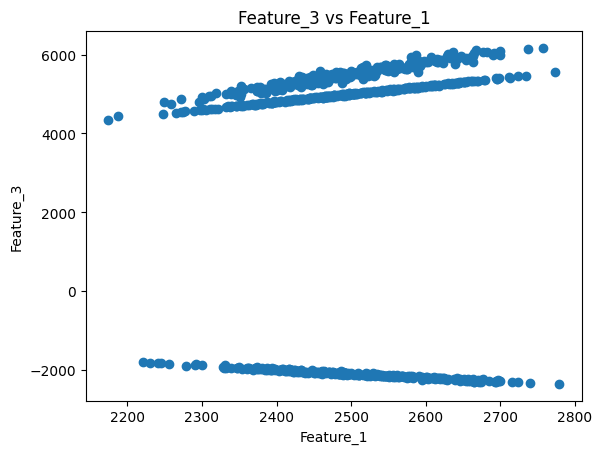

In [10]:
plt.scatter(df['Feature_1'], df['Feature_3'])
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Feature_3 vs Feature_1')
plt.show()

In [13]:
df.to_csv('/content/fake_data.csv', index=False)